In [7]:
# Importing necessary paackages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
seed = 4353

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
#Load the data
loc1 = r"C:\Users\madhu\Downloads\Compressed\Amazon_Product_Review_Sentiment_Analysis-master\Amazon_Product_Review_Sentiment_Analysis-master\train_data.csv"
loc2 = r"C:\Users\madhu\Downloads\Compressed\Amazon_Product_Review_Sentiment_Analysis-master\Amazon_Product_Review_Sentiment_Analysis-master\test_data.csv"
train = pd.read_csv(loc1)
test = pd.read_csv(loc2)

In [10]:
print('The train dataset contans {} rows and {} columns'.format(train.shape[0], train.shape[1]))

The train dataset contans 4000 rows and 8 columns


In [15]:
#convert the train columns to lowercase
train.columns = train.columns.str.lower()

In [16]:
train.columns

Index(['name', 'brand', 'categories', 'primarycategories', 'reviews.date',
       'reviews.text', 'reviews.title', 'sentiment'],
      dtype='object')

In [18]:
train.head()

,name,brand,categories,primarycategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [19]:
train.isnull().sum()

name                  0
brand                 0
categories            0
primarycategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [21]:
train[train['reviews.title'].isnull()==True]

,name,brand,categories,primarycategories,reviews.date,reviews.text,reviews.title,sentiment
834,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-12-29T16:56:05.000Z,Best New Adult Toy in years! Wish I had purcha...,NaN,Positive
1268,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-29T16:56:05.000Z,Best New Adult Toy in years! Wish I had purcha...,NaN,Positive
1695,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-09-01T19:51:34.000Z,I bought the echo show for my mom for her birt...,NaN,Positive
1824,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-06-06T20:46:55.000Z,"this is pretty cool, we love ours, we listen t...",NaN,Positive
2786,Amazon Fire TV with 4K Ultra HD and Alexa Voic...,Amazon,"Amazon SMP,TV, Video & Home Audio,Electronics,...",Electronics,2017-11-30T21:40:30.000Z,Really cool device! Instantly noticed the diff...,NaN,Positive
2822,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-08-16T23:06:42.000Z,I love the Echo show. I have found so many use...,NaN,Positive
2933,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2018-01-06T15:03:52.000Z,"Awesome so far. Have used it as alarm clock, s...",NaN,Positive
3103,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2018-04-06T23:51:32.000Z,This was bought for a gift. But it looks nice....,NaN,Positive
3224,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-12-30T18:26:19.000Z,Delivered on time and it looked good will hook...,NaN,Positive
3690,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-04-06T23:51:32.000Z,This was bought for a gift. But it looks nice....,NaN,Positive


In [22]:
# we shall not drop the nan values of review title because we can still get information ffrom review text. 
# hence we will replace the nan values with blank whitespaces
train['reviews.title'].fillna(' ', inplace=True)

In [28]:
# Check if the sentiments outcomes are balanced
sentiments_count = train['sentiment'].value_counts()
sentiments_count

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

The training set is imbalanced

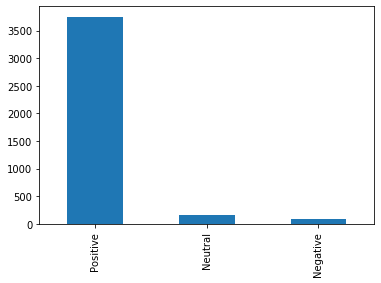

In [30]:
sentiments_count.plot(kind='bar')

<BarContainer object of 3 artists>

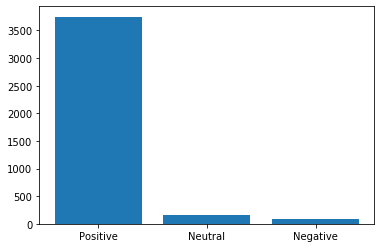

In [26]:
plt.bar(height=train['sentiment'].value_counts(), x=train['sentiment'].value_counts().index)

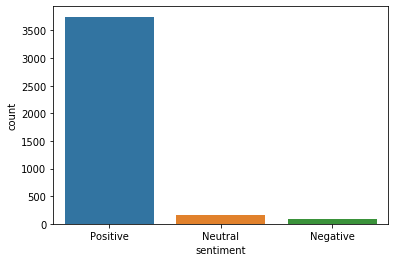

In [32]:
sns.countplot(train.sentiment)

In [33]:
test.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [34]:
test['reviews.title'].fillna(' ', inplace=True)

In [45]:
#Creating Train and Test datasets with only the product reviews (Complete Review = Review Text + Review Title)

X_train = train['reviews.text'] + ' ' + train['reviews.title']
y_train = train['sentiment']

In [46]:
X_test = test['reviews.text'] + ' ' + test['reviews.title']
y_test = test['sentiment']

In [47]:
X_train[0]

'Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money Powerful tablet'

In [48]:
X_train_df = pd.DataFrame(data=X_train)
X_train_df.columns = ['review']
X_train_df.head()


,review
0,Purchased on Black FridayPros - Great Price (e...
1,I purchased two Amazon in Echo Plus and two do...
2,Just an average Alexa option. Does show a few ...
3,"very good product. Exactly what I wanted, and ..."
4,This is the 3rd one I've purchased. I've bough...


##### preprocessing

In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
def X_final(X_train_data, X_test_data):
    
    #functions for removing the punctuations
    def remove_punctuations_from_string(X_data):
        string1 = X_data.lower()
        translation_table = dict.fromkeys(map(ord, string.punctuation), ' ')
        string2 = string1.translate(translation_table)
        return string2
    
    X_train_data_clear_punct = []
    for i in range(len(X_train_data)):
        train_string = remove_punctuations_from_string(X_train_data[i])
        X_train_data_clear_punct.append(train_string)
        
    X_test_data_clear_punct = []
    for i in range(len(X_test_data)):
        test_string = remove_punctuations_from_string(X_test_data[i])
        X_test_data_clear_punct.append(test_string)
        
    # function to remove stopwords
    def remove_stopwords_from_string(X_data):
        pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
        string2 = pattern.sub(' ', X_data)
        return string2
    
    X_train_data_clear_stopwords = []
    for i in range(len(X_train_data)):
        train_string = remove_stopwords_from_string(X_train_data[i])
        X_train_data_clear_stopwords.append(train_string)
        
    X_test_data_clear_stopwords = []
    for i in range(len(X_test_data)):
        test_string = remove_stopwords_from_string(X_test_data[i])
        X_test_data_clear_stopwords.append(test_string)
        
    # function for tokenizing words
    def tokenized_words(X_data):
        words = nltk.word_tokenize(X_data)
        return words
    
    X_train_data_tokenized_words = []
    for i in range(len(X_train_data[i])):
        train_string = tokenized_words(X_train_data[i])
        X_train_data_tokenized_words.append(train_string)
        
    X_test_data_tokenized_words = []
    for i in range(len(X_test_data)):
        test_string = tokenized_words(X_test_data[i])
        X_test_data_tokenized_words.append(test_string)

    # function for Lemmatization
    lemmatizer = WordNetLemmatizer()
    def lemmatize_words(X_data):
        words = lemmatizer.lemmatize(X_data)
        return words
    
    X_train_data_lemmatized_words = []
    for i in range(len(X_train_data)):
        train_string = lemmatize_words(X_train_data[i])
        X_train_data_lemmatized_words.append(train_string)
        
    X_test_data_lemmatized_words = []
    for i in range(len(X_test_data)):
        test_string = lemmatizer.lemmatize(X_test_data[i])
        X_test_data_lemmatized_words.append(test_string)
        
    
    # creating the bag of words model
    cv = CountVectorizer(max_features=1000)
    
    X_train_data_vector = cv.fit_transform(X_train_data_lemmatized_words).toarray()
    X_test_data_vector = cv.fit_transform(X_test_data_lemmatized_words).toarray()
    
    
    tfidf = TfidfTransformer()
    
    X_train_data_tfidf = tfidf.fit_transform(X_train_data_vector).toarray()
    X_test_data_tfidf = tfidf.fit_transform(X_test_data_vector).toarray()
    
    return X_train_data_tfidf, X_test_data_tfidf                         

#### Model selection

In [57]:
train_X, test_X = X_final(X_train, X_test)

In [42]:
MNB = MultinomialNB()

In [58]:
MNB.fit(train_X, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
predictions = MNB.predict(test_X)

In [60]:
# Model evaluation

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

MNB_f1 = round(f1_score(y_test, predictions, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

    Negative       0.07      0.04      0.05        24
     Neutral       0.09      0.13      0.10        39
    Positive       0.94      0.93      0.93       937

    accuracy                           0.88      1000
   macro avg       0.36      0.37      0.36      1000
weighted avg       0.89      0.88      0.88      1000

[[  1   0  23]
 [  1   5  33]
 [ 13  53 871]]
Accuracy :  87.7  %
f1_score :  0.881
